# [Prof. Dalvan Griebler](mailto:dalvan.griebler@pucrs.br)

## Programação Orientada a Dados (POD) - Turma 10 (POD_98H04-06)

**Atualizado**: 17/11/2022

**Descrição**: Trabalho Individual: Manipulação, Análise e Visualização Vetorial e Tabular de Dados

**Copyright &copy;**: Este documento está sob a licensa da Criative Commons [BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode)

**_Atenção: Pontuação extra para quem explicar como funcionam as partes dos códigos para resolver cada questão através de comentário do Python (`#`)._**

**_Atenção: O resultado deverá ser igual ao resultado esperado._**

### Trabalho realizado por:

# Bibliotecas Autorizadas

Não importe outras bibliotecas além destas, pois não estão autorizadas para o uso.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

# Parte-1: Manipulação de Dados Vetorial e Geração de Gráficos Simples

_Atenção: não será permitido o uso de laços nesta parte do trabalho sobre manipulação vetorial._

## 1. Crie um array 2D `shape(10,10)`  e realize operações de indexação e fatiamento para obter o seguinte resultado.

```bash
   [[ 1.,  2.,  3.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
    [ 2.,  1.,  2.,  3., 10., 10., 10., 10., 10., 10.],
    [ 3.,  2.,  1.,  2.,  3., 15., 15., 15., 15., 15.],
    [ 5.,  3.,  2.,  1.,  2.,  3., 20., 20., 20., 20.],
    [ 5., 10.,  3.,  2.,  1.,  2.,  3., 25., 25., 25.],
    [ 5., 10., 15.,  3.,  2.,  3.,  2.,  3., 30., 30.],
    [ 5., 10., 15., 20.,  3.,  2.,  3.,  2.,  3., 35.],
    [ 5., 10., 15., 20., 25.,  3.,  2.,  3.,  2.,  3.],
    [ 5., 10., 15., 20., 25., 30.,  3.,  2.,  3.,  2.],
    [ 5., 10., 15., 20., 25., 30., 35.,  3.,  2.,  3.]]
    
```

In [3]:
def runnerUp(L,C,W,soma,array):#faz as operações do canto superior direito
    if W<0:
        new = array #cria uma copia do array
        new[L:C,W:] = soma #Separa uma linha de altura e cada vez menos comprimento(começando em 7) e...
        #... Transforma os valores desta secção em 'soma'
        return runnerUp(L+1,C+1,W+1,soma+5,new)#Logo, vai para a próxima linha, diminui o comprimento e...
        #... aumenta soma em 5
    else:
        return array#Quando termina as operações retorna o array


def runnerDown(L,W,soma,array):#faz as operações do canto inferior esquerdo
    if L != 10:
        new = array#Cria uma copia do array
        new[L:,W:W+1] = soma#Separa todas as 7 ultimas linhas como a altura inicial, e...
        #... um valor de comprimento que aumenta em 1 a cada ciclo e os transforma em 'soma'
        return runnerDown(L+1,W+1,soma+5,new)#diminui a altura em 1(agora pegando somente a partir da linha 4) e...
        #... aumenta em 1 o comprimento além de adicionar 5 à soma
    else:
        return array#Quando L chega ao fim do array, retorna o array


def runnerMiddle(soma,array):#faz as operações do centro
    new = array
    #Diagonal primaria
    diagP = np.diag(new)#poem a diagonal em uma variavel
    diagP.setflags(write=1)#permite a escrita na variavel
    diagP[:len(diagP)] = soma
    half = int(len(diagP)/2)
    diagP[half:] = soma+2
    #mais proxima
    diagS1 = np.diag(new,-1)#poem a diagonal em uma variavel
    diagS2 = np.diag(new,1)#poem a diagonal em uma variavel
    diagS1.setflags(write=1)#permite a escrita na variavel
    diagS2.setflags(write=1)#permite a escrita na variavel
    diagS1[:] = soma+1
    diagS2[:] = soma+1
    #mais distante
    diagSS1 = np.diag(new,-2)#poem a diagonal em uma variavel
    diagSS2 = np.diag(new,+2)#poem a diagonal em uma variavel
    diagSS1.setflags(write=1)#permite a escrita na variavel
    diagSS2.setflags(write=1)#permite a escrita na variavel
    diagSS1[:] = soma+2
    diagSS2[:] = soma+2
    print(new)




arr = np.array(100*[0.])#criação do array 1D
pronto = arr.reshape(10,10)#transformação para 2D
feito = runnerUp(0,1,-len(pronto)+3,5,pronto)#faz as operações do canto superior direito
feito = runnerDown(len(pronto)-7,-len(pronto),5,feito)#faz as operações do canto inferior esquerdo
runnerMiddle(1,feito)#faz as operações do centro

[[ 1.  2.  3.  5.  5.  5.  5.  5.  5.  5.]
 [ 2.  1.  2.  3. 10. 10. 10. 10. 10. 10.]
 [ 3.  2.  1.  2.  3. 15. 15. 15. 15. 15.]
 [ 5.  3.  2.  1.  2.  3. 20. 20. 20. 20.]
 [ 5. 10.  3.  2.  1.  2.  3. 25. 25. 25.]
 [ 5. 10. 15.  3.  2.  3.  2.  3. 30. 30.]
 [ 5. 10. 15. 20.  3.  2.  3.  2.  3. 35.]
 [ 5. 10. 15. 20. 25.  3.  2.  3.  2.  3.]
 [ 5. 10. 15. 20. 25. 30.  3.  2.  3.  2.]
 [ 5. 10. 15. 20. 25. 30. 35.  3.  2.  3.]]


## 2. Para o seguinte array, calcule: 
- Médias das diagonais principal e secundária.
- Média das linhas e coluna para posteriomente plotar um gráfico de linhas.

```python
 np.array([[ 44,  70,  98,  63,  30,  96,  26,  94,  20,  67],
       [ 22,  79,  53,  16,  46,  63,  45,  61,  66,  10],
       [ 71,  96,  68,  14,  86,  99,   1,  44,  66,  20],
       [ 92,  40,   0,  12,  91,   1,   9,  19,  60,   5],
       [ 53,  46,  65,  73,  29,   0,  89, 100,  13,  78],
       [ 81,  16,  21, 100,  36,  51,  38,  85,  90,  35],
       [ 91,  70,   8,  20,  60,  40,  14,  16,   0,  19],
       [ 87,  10,  24,  40,  62,   5,  32,  28,  69,  29],
       [ 94,  88,  40,   4,  85,  61,  30,  68,  63,  61],
       [ 74, 100,  34,  88,   0,  12,  61,  32,  10,  46]])
```

**Resultado esperado:**

Média diagonal principal:  43.4

Média diagonal secundária:  42.8


![](fig-ti2-ex2.png)

Média diagonal principal:  43.4
Média diagonal secundária: 42.8 


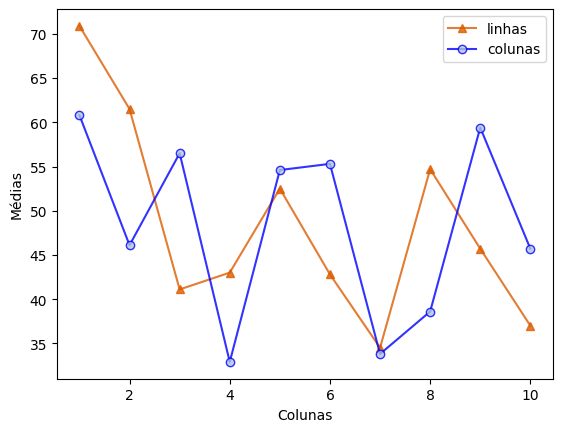

In [171]:
arr = np.array([[ 44,  70,  98,  63,  30,  96,  26,  94,  20,  67],
       [ 22,  79,  53,  16,  46,  63,  45,  61,  66,  10],
       [ 71,  96,  68,  14,  86,  99,   1,  44,  66,  20],
       [ 92,  40,   0,  12,  91,   1,   9,  19,  60,   5],
       [ 53,  46,  65,  73,  29,   0,  89, 100,  13,  78],
       [ 81,  16,  21, 100,  36,  51,  38,  85,  90,  35],
       [ 91,  70,   8,  20,  60,  40,  14,  16,   0,  19],
       [ 87,  10,  24,  40,  62,   5,  32,  28,  69,  29],
       [ 94,  88,  40,   4,  85,  61,  30,  68,  63,  61],
       [ 74, 100,  34,  88,   0,  12,  61,  32,  10,  46]])#cria o array

#pega as diagonais
diagP = np.diag(arr)#diagonal primaria
diagS = np.diag(np.flip(arr,1))#para a diagonal secundaria primeiro viramos o array na horizontal


#calculo simples da media
print("Média diagonal principal: ",np.sum(diagP/len(diagP)))#Soma os valores da diagonal e divide pelo tamanho da diagonal
print("Média diagonal secundária: %.1f "%np.sum(diagS/len(diagS)))#Faz a mesma coisa de o de cima, porém com a diagonal secundária


linhas = arr.sum(0)/len(arr)#cria um array com as somas de cada linha
colunas = arr.sum(1)/len(arr)#cria um array com as somas de cada coluna

plt.plot(linhas,'-^',color = '#DD5C00',alpha = 0.8,label = "linhas")#cria uma linha com triangulos laranja escuro de intensidade 0.8 e nome linhas
plt.plot(colunas,'b-',marker = 'o',mec = 'b',alpha = 0.8,mfc = 'lightsteelblue',label = "colunas")#cria uma linha com bolinhas cuja cor interior é lightsteelblue e contorno é azul com nome colunas    
plt.legend()#Cria a legenda do grafico
plt.xlabel("Colunas")#cria a label do axis x
plt.ylabel("Médias")#cria a label do axis y
x = np.delete(np.arange(0,len(linhas)+1),np.arange(1,len(linhas)+1,2))#Cria x, que é igual aos valores pares de 'np.arange(0,len(linhas)+1)'
plt.xticks(np.arange(1,len(linhas)+1,2),x[1:])#cria 5 xticks e poem x(excluindo o 0) como valores
plt.show()#Mostra o gráfico

# Parte-2: Manipulação de Dados Tabular

## 3. Forneça um único DataFrame a partir dos dados contidos em `cars_info.csv` e `cars_valores.csv`. Depois salve o DataFrame em um arquivo chamado `cars.csv` para reusar nas próximas questões.

_Obs: Para quem usar laços nesta questão, terá um desconto de 25% na nota._


**Resultado Esperado do DataFrame:**
```bash
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   object
 8   km_driven      4340 non-null   int64 
dtypes: int64(3), object(6)
```

In [4]:
carInfo = pd.read_csv('CAR_INFO.csv')
cars = pd.read_csv('CAR_VALUES.csv')
carInfoDT = pd.DataFrame(carInfo)
carsDT = pd.DataFrame(cars)
result = carInfoDT.merge(carsDT,how='inner')
display(result.info())



result.to_csv('CARS.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   object
 8   km_driven      4340 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 339.1+ KB


None

## 4 - Adicione o campo `marca` no `cars.csv` e corrija os dados.

_Obs: o valor do campo marca deve ser extraído de uma coluna do próprio dataset_

_Obs: Atente-se aos dados faltantes no campo selling-price, eles devem ser preenchidos com a média de preço dos carros da mesma marca_

**Resultado Esperado do DataFrame:**


```bash
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   int64 
 8   km_driven      4340 non-null   int64 
 9   marca          4340 non-null   object
dtypes: int64(4), object(6)
```

In [2]:
def dividir0(lista):#Retorna a primeira palavra de uma String
    new = lista.split(" ",)
    return new[0]

def dividir1(lista):#Retorna a segunda palavra de uma String
    new = lista.split(" ",)
    return int(new[1])

def inserir(cars,final):#cria uma lista substituindo 0 pela media da marca já registrada em 'final'
    if cars == 0:
        return final
    else:
        return cars
    
cars = pd.read_csv('CARS.csv')
listaNome = list(cars.name)#cria uma lista dos nomes dos carros
listaPreco = list(cars.selling_price)#cria uma lista dos preços dos carros
marcas = list(map(dividir0,listaNome))#cria uma lista das marcas, a partir da primeira palavra do nome
cars.insert(len(cars.columns),"marca",marcas)#insere a lista de marcas como a última coluna
preco = list(map(dividir1,listaPreco))#cria uma lista de preços int, a partir da segunda palavra de selling_price
cars.drop(["selling_price"],axis=1,inplace=True)#substitui o selling_price anterior pelo novo preco
cars.insert(7,"selling_price",preco)

grupo = cars.groupby('marca').selling_price#divide o arquivo pelo nome da marca
Media = dict(grupo.mean())#calcula a media de cada marca
final = []#inicializa final
for valor in grupo:
    marca = list(valor)[0]
    valores= list(valor)[1]
    for valor in valores:
        if valor == 0:
            final += [int(Media[marca])]#se o valor no arquivo é 0, substitui ele pela media de sua marca
        else:
            final += [valor]#se não for só copia para final
            
fim = list(map(inserir,cars,final))#cria uma lista substituindo 0 pela media da marca já registrada em 'final'
cars.drop(["selling_price"],axis=1,inplace=True)#substitui o selling_price anterior pelo novo 'final'
cars.insert(7,"selling_price",final)
cars.info()#mostra as informações de cars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   int64 
 8   km_driven      4340 non-null   int64 
 9   marca          4340 non-null   object
dtypes: int64(4), object(6)
memory usage: 339.2+ KB


## 5- Mostre a diferença de preço de venda entre `First Owner` e `Second Owner` dos top 5 marcas mais caras pelo preço médio em gráfico de barras do dataset `cars.csv`.

**Resultado Esperado**

![](fig-ti2-ex5.png)


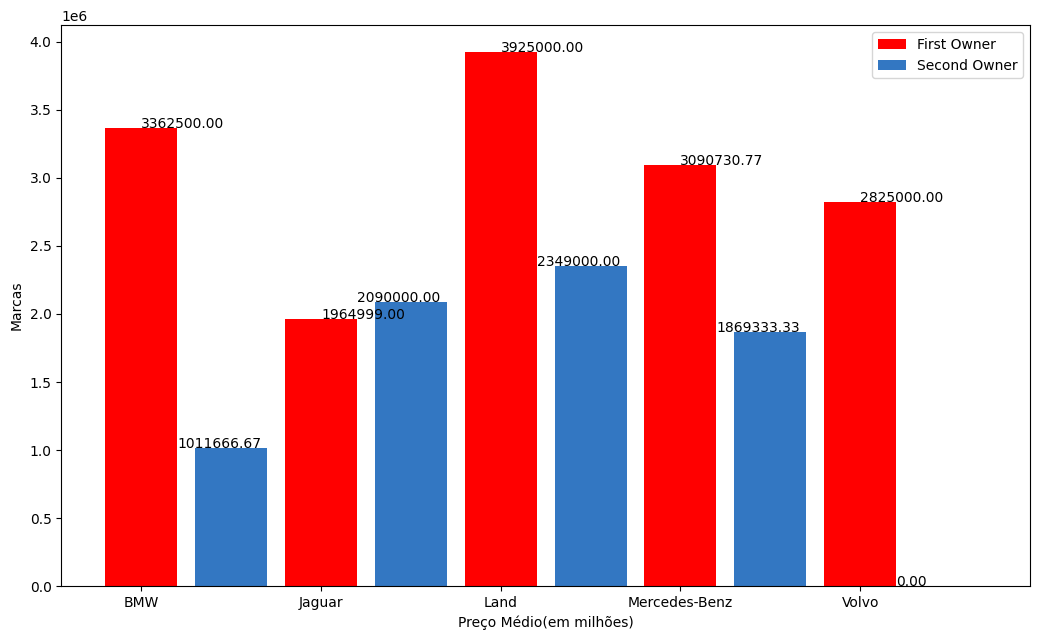

In [399]:
#dividir por marca
#sum first
#sum second
#montar grafico
def dividir0(lista):#Retorna a primeira palavra de uma String
    new = lista.split(" ",)
    return new[0]

def dividir1(lista):#Retorna a segunda palavra de uma String
    new = lista.split(" ",)
    return int(new[1])

cars = pd.read_csv('CARS.csv')
listaNome = list(cars.name)#cria uma lista dos nomes dos carros
listaPreco = list(cars.selling_price)#cria uma lista dos preços dos carros
marcas = list(map(dividir0,listaNome))#cria uma lista das marcas, a partir da primeira palavra do nome
cars.insert(len(cars.columns),"marca",marcas)#insere a lista de marcas como a última coluna
preco = list(map(dividir1,listaPreco))#cria uma lista de preços int, a partir da segunda palavra de selling_price
cars.drop(["selling_price"],axis=1,inplace=True)#substitui o selling_price anterior pelo novo preco
cars.insert(7,"selling_price",preco)

marcasPrice = cars.groupby('marca').selling_price#separa cars por marca
medias = marcasPrice.mean(numeric_only=True)#encontra as medias
TopMarcas = dict(medias.nlargest(5))#separa as 5 maiores
chaves = list(TopMarcas.keys())#cria uma lista das 5 marcas com maiores medias

#Encontra as medias dos preços dos carros First Owner de cada marca
Land1 = (cars.loc[(cars['owner'] == 'First Owner') & (cars['marca'] == chaves[0])]).selling_price.mean()
BMW1 = (cars.loc[(cars['owner'] == 'First Owner') & (cars['marca'] == chaves[1])]).selling_price.mean()
Mercedes1 = (cars.loc[(cars['owner'] == 'First Owner') & (cars['marca'] == chaves[2])]).selling_price.mean()
Volvo1 = (cars.loc[(cars['owner'] == 'First Owner') & (cars['marca'] == chaves[3])]).selling_price.mean()
Jaguar1 = (cars.loc[(cars['owner'] == 'First Owner') & (cars['marca'] == chaves[4])]).selling_price.mean()

#Encontra as medias dos preços dos carros Second Owner de cada marca
Land2 = (cars.loc[(cars['owner'] == 'Second Owner') & (cars['marca'] == chaves[0])]).selling_price.mean()
BMW2 = (cars.loc[(cars['owner'] == 'Second Owner') & (cars['marca'] == chaves[1])]).selling_price.mean()
Mercedes2 = (cars.loc[(cars['owner'] == 'Second Owner') & (cars['marca'] == chaves[2])]).selling_price.mean()
Volvo2 = (cars.loc[(cars['owner'] == 'Second Owner') & (cars['marca'] == chaves[3])]).selling_price.mean()
Jaguar2 = (cars.loc[(cars['owner'] == 'Second Owner') & (cars['marca'] == chaves[4])]).selling_price.mean()

#Se media == nan, media = 0
if np.isnan(Land1):
    Land1=0
if np.isnan(Land2):
    Land2=0

if np.isnan(BMW1):
    BMW1=0
if np.isnan(BMW2):
    BMW2=0

if np.isnan(Mercedes1):
    Mercedes1=0
if np.isnan(Mercedes2):
    Mercedes2=0

if np.isnan(Volvo1):
    Volvo1=0
if np.isnan(Volvo2):
    Volvo2=0
    
if np.isnan(Jaguar1):
    Jaguar1=0
if np.isnan(Jaguar2):
    Jaguar2=0
    

############BARRAS BMW
plt.bar(0,int(BMW1),width = 0.4,color = 'r',label = 'First Owner',data = BMW1)
plt.text(0,int(BMW1),"{:.2f}".format(BMW1))
plt.bar(0.5,BMW2,width = 0.4,color = '#0055b3',alpha = 0.8,label = 'Second Owner')
plt.text(0.2,int(BMW2),"{:.2f}".format(BMW2))
############BARRAS JAGUAR
plt.bar(1,Jaguar1,width = 0.4,color = 'r',data = Jaguar1)
plt.text(1,int(Jaguar1),"{:.2f}".format(Jaguar1))
plt.bar(1.5,Jaguar2,width = 0.4,color = '#0055b3',alpha = 0.8)
plt.text(1.2,int(Jaguar2),"{:.2f}".format(Jaguar2))
############BARRAS LAND
plt.bar(2,Land1,width = 0.4,color = 'r',data = Land1)
plt.text(2,int(Land1),"{:.2f}".format(Land1))
plt.bar(2.5,int(Land2),width = 0.4,color = '#0055b3',alpha = 0.8)
plt.text(2.2,int(Land2),"{:.2f}".format(Land2))
############BARRAR MERCEDES
plt.bar(3,Mercedes1,width = 0.4,color = 'r',data = Mercedes1)
plt.text(3,int(Mercedes1),"{:.2f}".format(Mercedes1))
plt.bar(3.5,int(Mercedes2),width = 0.4,color = '#0055b3',alpha = 0.8)
plt.text(3.2,int(Mercedes2),"{:.2f}".format(Mercedes2))
############BARRAS VOLVO
plt.bar(4,Volvo1,width = 0.4,color = 'r',data = Volvo1)
plt.text(4,int(Volvo1),"{:.2f}".format(Volvo1))
plt.bar(4.5,Volvo2,width = 0.4,color = '#0055b3',alpha = 0.8)
plt.text(4.2,Volvo2,"{:.2f}".format(Volvo2))

plt.xlabel("Preço Médio(em milhões)")#cria a label do axis x
plt.ylabel("Marcas")#cria a label do axis y
plt.rcParams["figure.figsize"] = [10.50, 6.50]#ajusta o tamanho e proporções do gráfico
plt.xticks(np.arange(5),[chaves[1],chaves[4],chaves[0],chaves[2],chaves[3]])#Poem as chaves como ticks no axis x, na ordem correta
plt.legend()#Mostra a legenda
plt.show()


## 6- Mostre em gráfico de pizza (`Axes(1,2)`) com os 5 anos de maior número de vendas de carros usados (`Second Owner`) e maior número de vendas de carros novos (`First Owner`).

**Resultado Esperado**

![](fig-ti2-ex6.png)

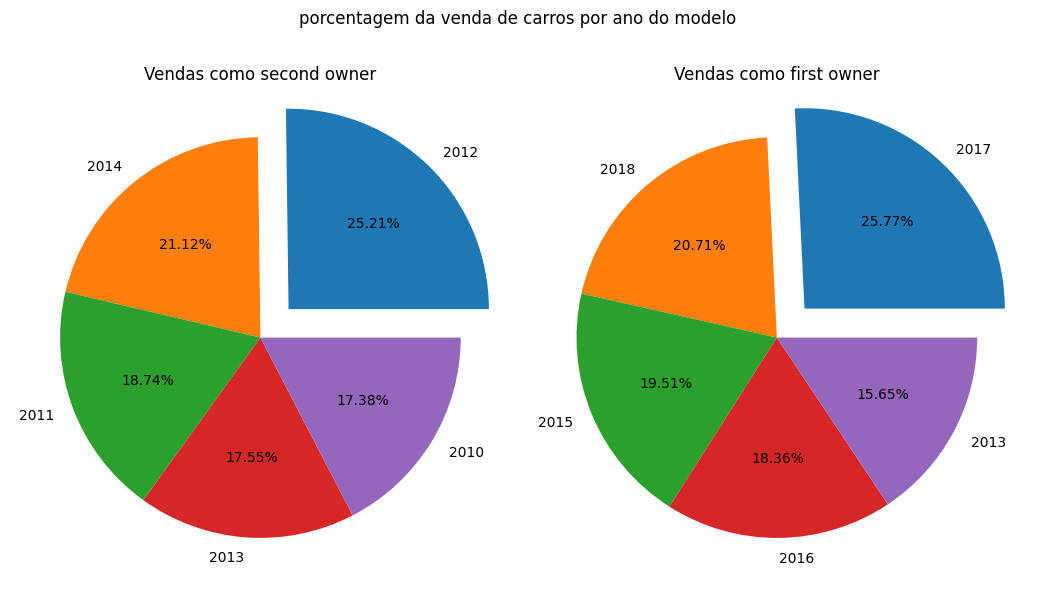

In [310]:
def getPercent(out,soma,ToDo,done):#função recursiva que encontra e retorna as % a partir dos valores de sua soma
    if ToDo < done:
        new = out.copy()
        value = list(new.values())#separa os valores
        nomes = list(new.keys())# e os anos
        percent =(value[ToDo]/soma)*100#cria a fração em forma decimal e transforma em %
        new[nomes[ToDo]] = "{:.2f}".format(percent)#formata e adiciona a um Dict new
        return getPercent(new,soma,ToDo+1,done)#vai para o proximo
    else:
        return out#quando termina retorna output
    

cars = pd.read_csv('CARS.csv')#Le o arquivo
#Encontra os anos separando cars por first/second owner,então separando novamente por ano e por fim contando...
#... o número de vezes que cada ano aparece e selecionando os top 5
firstyears = dict(cars.loc[cars['owner'] == 'First Owner'].year.value_counts().nlargest(5))
secondyears = dict(cars.loc[cars['owner'] == 'Second Owner'].year.value_counts().nlargest(5))

fig,(ax2,ax1) = plt.subplots(1,2)#Cria as subplots ainda vazias com ax2 na esquerda e ax1 na direita
fig.suptitle('porcentagem da venda de carros por ano do modelo')#da um título principal
######FIRST OWNER
#Separa os valores de first owner dos top 5 selecionados anteriormente
firstOwner = cars.loc[(cars['owner'] == 'First Owner')&(cars['year'].isin(list(firstyears.keys())))]
firstyearCounts = firstOwner.year.value_counts()#conta quantas vezes cada valor aparece
firstsoma = firstyearCounts.sum()#soma o total
percent1 = getPercent(dict(firstyearCounts),firstsoma,0,len(dict(firstyearCounts)))#utiliza getPercent para...
#...encontrar as porcentagens
#Cria a pie chart com os valores separados anteriormente, agora com o simbolo de % e apenas 2 casas decimais
ax1.pie(percent1.values(), labels = percent1.keys(),explode = (0.2,0,0,0,0),autopct='%1.2f%%')
ax1.set_title('Vendas como first owner')#da um subtitulo

######SECOND OWNER
#Separa os valores de second owner dos top 5 selecionados anteriormente
secondOwner = cars.loc[(cars['owner'] == 'Second Owner')&(cars['year'].isin(list(secondyears.keys())))]
yearCounts = secondOwner.year.value_counts()#conta quantas vezes cada valor aparece
soma = yearCounts.sum()#soma o total
percent2 = getPercent(dict(yearCounts),soma,0,len(dict(yearCounts)))#utiliza getPercent para encontrar as porcentagens
#Cria a pie chart com os valores separados anteriormente, agora com o simbolo de % e apenas 2 casas decimais
ax2.pie(percent2.values(), labels = percent2.keys(),explode = (0.2,0,0,0,0),autopct='%1.2f%%')
ax2.set_title('Vendas como second owner')#da um subtitulo

plt.show()#mostra os graficos


## 7. Para a base de dados `cars.csv`, apresente dois gráficos `boxplot`  (`Axes(1,2)`) do valor de `km_driven`, sendo um para os 5 mais vendidos como `First Owner` e outro para os 5 mais vendidos como `Second Owner`.

**Resultado Esperado**

![](fig-ti2-ex7.png)

In [414]:
#Não tenho certeza porque, mas os carros mais vendidos como Second Owner não são os mesmos para mim
cars = pd.read_csv('CARS.csv')#Le o arquivo
secondnome = cars.loc[cars['owner'] == 'Second Owner'].name.value_counts()
display(secondnome)
topsecondnome = cars.loc[cars['owner'] == 'Second Owner'].name.value_counts().nlargest(5)
display(topsecondnome)

Maruti Alto LXi                              22
Maruti Alto 800 LXI                          17
Maruti Alto LX                               15
Renault Duster 85PS Diesel RxL               14
Maruti SX4 Vxi BSIV                          13
                                             ..
Mercedes-Benz New C-Class 200 CDI Classic     1
Tata Tiago 1.2 Revotron XZA                   1
Renault Koleos 2.0 Diesel                     1
Hyundai Verna SX CRDi AT                      1
Hyundai i20 Magna 1.4 CRDi                    1
Name: name, Length: 568, dtype: int64

Maruti Alto LXi                   22
Maruti Alto 800 LXI               17
Maruti Alto LX                    15
Renault Duster 85PS Diesel RxL    14
Maruti SX4 Vxi BSIV               13
Name: name, dtype: int64

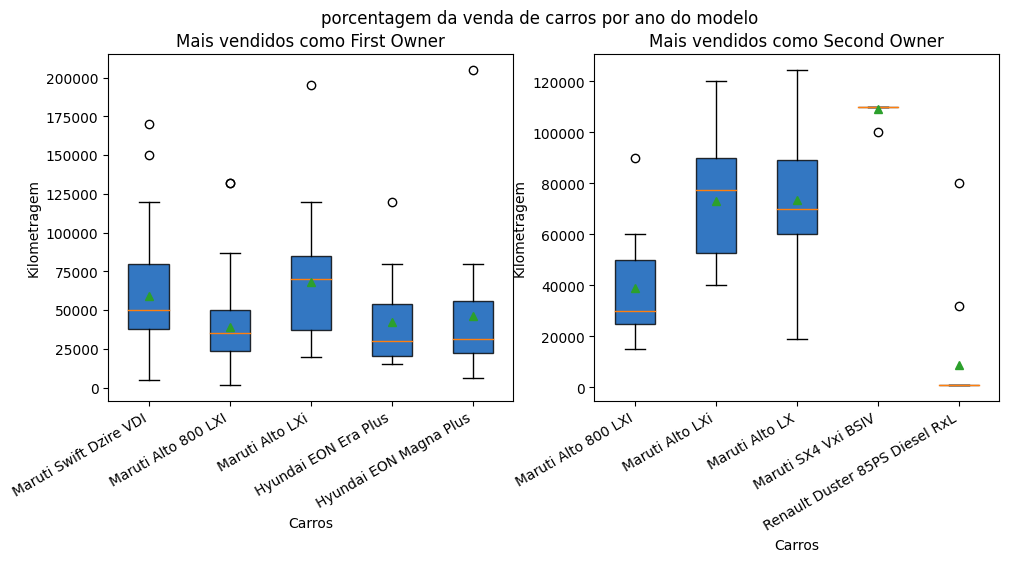

In [14]:
cars = pd.read_csv('CARS.csv')#Le o arquivo
#Encontra o primeiro ano separando cars por first/second owner, separando novamente por ano, então contando...
#... o número de vezes que cada ano aparece e selecionando os top 5
firstnome = dict(cars.loc[cars['owner'] == 'First Owner'].name.value_counts().nlargest(5))
secondnome = dict(cars.loc[cars['owner'] == 'Second Owner'].name.value_counts().nlargest(5))


######First Owner Valores
temp = list(firstnome.keys())
newkeys = [temp[0],temp[1],temp[4],temp[2],temp[3]]#Arruma a ordem dos nomes
#separa a kilometragem dos carros de first owner baseando-se nos nomes previemente selecionados
nome1 = cars.loc[(cars['owner'] == 'First Owner')&(cars['name'] == newkeys[0])].km_driven
nome2 = cars.loc[(cars['owner'] == 'First Owner')&(cars['name'] == newkeys[1])].km_driven
nome3 = cars.loc[(cars['owner'] == 'First Owner')&(cars['name'] == newkeys[2])].km_driven
nome4 = cars.loc[(cars['owner'] == 'First Owner')&(cars['name'] == newkeys[3])].km_driven
nome5 = cars.loc[(cars['owner'] == 'First Owner')&(cars['name'] == newkeys[4])].km_driven

######Second Owner Valores
temp1 = list(secondnome.keys())
newkeys2 = [temp1[1],temp1[0],temp1[2],temp1[4],temp1[3]]#arruma a ordem dos nomes
#separa a kilometragem dos carros de second owner baseando-se nos nomes previemente selecionados
nome12 = cars.loc[(cars['owner'] == 'Second Owner')&(cars['name'] == newkeys2[0])].km_driven
nome22 = cars.loc[(cars['owner'] == 'Second Owner')&(cars['name'] == newkeys2[1])].km_driven
nome32 = cars.loc[(cars['owner'] == 'Second Owner')&(cars['name'] == newkeys2[2])].km_driven
nome42 = cars.loc[(cars['owner'] == 'Second Owner')&(cars['name'] == newkeys2[3])].km_driven
nome52 = cars.loc[(cars['owner'] == 'Second Owner')&(cars['name'] == newkeys2[4])].km_driven


fig,(ax1,ax2) = plt.subplots(1,2)#Cria as subplots ainda vazias com ax1 na esquerda e ax2 na direita
fig.suptitle('porcentagem da venda de carros por ano do modelo')#da um título principal
plt.rcParams["figure.figsize"] = [11, 4]#ajusta o tamanho e proporções do gráfico para aumentar legibilidade

######First Owner Grafico
#Faz a formatação do gráfico
ax1.boxplot([nome1,nome2,nome3,nome4,nome5],bootstrap = 1000,showmeans = True,
            labels = newkeys,patch_artist = True,boxprops = dict(facecolor='#0055b3',alpha=0.8))
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30,ha="right")#ajusta a rotação das xlabels
ax1.set_title("Mais vendidos como First Owner")#cria um subtítulo
ax1.set_ylabel('Kilometragem')#cria uma y label
ax1.set_xlabel('Carros')#cria uma x label

#####Second Owner Grafico
#Faz a formatação do gráfico
ax2.boxplot([nome12,nome22,nome32,nome42,nome52],bootstrap = 1000,showmeans = True,
            labels = newkeys2,patch_artist = True,boxprops = dict(facecolor='#0055b3',alpha=0.8))
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30,ha="right")#ajusta a rotação das xlabels
ax2.set_title("Mais vendidos como Second Owner")#cria um subtítulo
ax2.set_ylabel('Kilometragem')#cria uma y label
ax2.set_xlabel('Carros')#cria uma x label
plt.show()


